# Bangladesh Refugee Choropleth Matplotlib Map

In [6]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 57.6 MB/s eta 0:00:00


In [29]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import contextily as ctx
import requests
from io import BytesIO
import json

## Data Importation

In [11]:
## Shapefile Data
fp = "/content/drive/My Drive/Colab/Bangladesh_pop/master_list.shp"
map_df = gpd.read_file(fp)
map_df


,SSID,BlockID,Site Name,Other Site,Block Name,Note,Status,Priority,Latitude,Longitude,...,Type,Division,District,Upazila,Union,Last Round,Last Updat,Households,Individual,geometry
0,CXB-004,CXB-004-01,Burma Para,Tasnimarkhola,Burma Para,None,Active,High,21.175719,92.142577,...,New Spontaneous Site,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,6.0,2017-10-01,"5,369","27,594",POINT (92.14258 21.17572)
1,CXB-012,CXB-012-01,Jamtoli,Thangkhali,Jamtoli,None,Active,High,21.159275,92.147026,...,New Spontaneous Site,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,6.0,2017-10-01,"5,274","30,375",POINT (92.14703 21.15927)
2,CXB-014,CXB-014-01,Jumpara,None,Jumpara,None,Active,Normal,21.068603,92.143758,...,Host Communities,Chittagong,Cox's_Bazar,Teknaf,Baharchhara,6.0,2017-10-03,73,400,POINT (92.14376 21.0686)
3,CXB-017,CXB-017-03,Leda,None,Nuralipara,None,Active,Normal,20.963984,92.245284,...,Host Communities,Chittagong,Cox's_Bazar,Teknaf,Nhilla,6.0,2017-10-02,"2,054","10,270",POINT (92.24528 20.96398)
4,CXB-017,CXB-017-02,Leda,None,Moulovipara,None,Active,Normal,20.973953,92.245213,...,Host Communities,Chittagong,Cox's_Bazar,Teknaf,Nhilla,6.0,2017-10-02,"1,200","5,945",POINT (92.24521 20.97395)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,CXB-131,CXB-131-01,Zone WW,None,Zone WW,None,Inactive,Normal,21.194572,92.145171,...,Additional Expansion,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,NaN,None,-,-,POINT (92.14517 21.19457)
80,CXB-132,CXB-132-01,Zone XX,None,Zone XX,None,Inactive,Normal,21.187816,92.146525,...,Additional Expansion,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,NaN,None,-,-,POINT (92.14652 21.18782)
81,CXB-133,CXB-133-01,Zone YY,None,Zone YY,None,Active,High,21.182003,92.146268,...,New Spontaneous Site,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,6.0,2017-10-07,700,"3,500",POINT (92.14627 21.182)
82,CXB-134,CXB-134-01,Zone ZZ,None,Zone ZZ,None,Inactive,Normal,21.191114,92.140468,...,Additional Expansion,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,NaN,None,-,-,POINT (92.14047 21.19111)


In [12]:
map_df.columns

Index(['SSID', 'BlockID', 'Site Name', 'Other Site', 'Block Name', 'Note',
       'Status', 'Priority', 'Latitude', 'Longitude', 'Class', 'Type',
       'Division', 'District', 'Upazila', 'Union', 'Last Round', 'Last Updat',
       'Households', 'Individual', 'geometry'],
      dtype='object')

In [101]:
map_df['Site Name'].unique()

array(['Burma Para', 'Jamtoli', 'Jumpara', 'Leda', 'Noyapara Muchoni',
       'Potibonia', 'Shamlapur', 'Zadimura', 'Britishpara',
       'Balukhali MS', 'Leda MS', 'Balukhali Pachim', 'Kutupalong MS',
       'Chonapara', 'Paschimpara', 'Hakimpara', 'Zone DD', 'Unchiprang',
       'Kutupalong RC Area', 'Nayapara RC Area', 'Zone BB', 'Chakmarkul',
       'Zone AA', 'Zone CC', 'Zone EE', 'Zone FF', 'Zone GG', 'Zone HH',
       'Zone KK', 'Zone II', 'Zone JJ', 'Zone LL', 'Zone MM', 'Zone NN',
       'Zone OO', 'Zone QQ', 'Zone PP', 'Zone RR', 'Zone SS', 'Zone TT',
       'Zone UU', 'Zone VV', 'Zone WW', 'Zone XX', 'Zone YY', 'Zone ZZ',
       'Zone ZA'], dtype=object)

In [10]:
## Data File for Summary Analysis
file_path = "/content/drive/My Drive/Colab/Bangladesh_pop/npm-r6-site-assessment-dataset-2017-october-xlsx-2.xlsx"
df = pd.read_excel(
    file_path,
    sheet_name=1,       # "Summary Analysis"
    skiprows=11,        # skip first 11 rows
    usecols="A:D"       # only columns A-D
)

## Data Overview
print(df.head())

       Location name  Total Households  Total individuals  Family size Avg.
0       Balukhali MS              9099              44289          4.867458
1  Balukhali Pachim                 35                175          5.000000
2        Britishpara               177                885          5.000000
3         Burma Para              5369              27594          5.139505
4         Chakmarkul              2000              10500          5.250000


In [89]:
# Polygon Data
locations_geodata = gpd.read_file("/content/drive/My Drive/Colab/Bangladesh_pop/bgd_admbnda_adm4_bbs_20201113.shp")
locations_geodata

,Shape_Leng,Shape_Area,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM4ALT1EN,ADM4ALT2EN,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,0.286382,0.001944,Abaipur,BD40448010,None,None,None,Shailkupa,BD404480,Jhenaidah,BD4044,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((89.29995 23.62161, 89.30005 23.62142..."
1,0.098597,0.000317,Abdullahpur,BD30599411,None,None,None,Tongibari,BD305994,Munshiganj,BD3059,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((90.48251 23.5537, 90.48244 23.55351,..."
2,0.170051,0.001055,Abdullapur,BD10092513,None,None,None,Char Fasson,BD100925,Bhola,BD1009,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((90.70433 22.15793, 90.70435 22.15791..."
3,0.055861,0.000172,Abdullapur,BD20153311,None,None,None,Fatikchhari,BD201533,Chittagong,BD2015,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((91.87498 22.57881, 91.87495 22.57865..."
4,0.312536,0.002235,Abdulpur,BD40507916,None,None,None,Kushtia Sadar,BD405079,Kushtia,BD4050,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((89.11685 23.76863, 89.11678 23.76841..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,0.183640,0.001056,Zanjira Paurashava,BD30869499,None,None,None,Zanjira,BD308694,Shariatpur,BD3086,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((90.31593 23.35038, 90.31599 23.35031..."
5156,0.249771,0.002037,Zianagar,BD50103381,None,None,None,Dhupchanchia,BD501033,Bogra,BD5010,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((89.10699 24.97027, 89.10701 24.97027..."
5157,0.349076,0.002370,Zindarpur,BD50385895,None,None,None,Kalai,BD503858,Joypurhat,BD5038,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((89.20917 25.01506, 89.20911 25.01486..."
5158,0.077289,0.000216,Zinjira,BD30263894,None,None,None,Keraniganj,BD302638,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((90.39317 23.71109, 90.39354 23.71121..."


In [97]:
# Filtering for Cox's Bazar
Coxs_Bazar_geodata = locations_geodata[locations_geodata['ADM2_EN'] == "Cox's Bazar"]
Coxs_Bazar_geodata

,Shape_Leng,Shape_Area,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM4ALT1EN,ADM4ALT2EN,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
73,0.216665,0.001496,Ali Akbar Deil,BD20224513,None,None,None,Kutubdia,BD202245,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((91.86643 21.78825, 91.865 21.78487, ..."
255,0.257282,0.001881,Badarkhali,BD20221610,None,None,None,Chakaria,BD202216,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((91.96287 21.75378, 91.96279 21.75337..."
312,0.471143,0.001660,Baharchhara,BD20229015,None,None,None,Teknaf,BD202290,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.18731 21.01805, 92.18736 21.01783..."
418,0.236535,0.001163,Bamo Bilchari,BD20221612,None,None,None,Chakaria,BD202216,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.20432 21.81173, 92.20434 21.81163..."
479,0.259008,0.001174,Bara Bakia,BD20225611,None,None,None,Pekua,BD202256,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((91.9946 21.85321, 91.99476 21.85318,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692,0.699217,0.007728,Teknaf,BD20229063,None,None,None,Teknaf,BD202290,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"MULTIPOLYGON (((92.27766 20.92221, 92.2779 20...."
4693,0.114044,0.000572,Teknaf Paurashava,BD20229099,None,None,None,Teknaf,BD202290,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.3142 20.85592, 92.2909 20.85146, ..."
4777,0.294981,0.002820,Ujantia,BD20225655,None,None,None,Pekua,BD202256,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((91.95914 21.79484, 91.95875 21.79468..."
4815,0.164831,0.001251,Uttar Dhurung,BD20224581,None,None,None,Kutubdia,BD202245,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((91.89574 21.88298, 91.89558 21.883, ..."


In [98]:
Coxs_Bazar_geodata['ADM3_EN'].unique()

array(['Kutubdia', 'Chakaria', 'Teknaf', 'Pekua', 'Maheshkhali',
       "Cox's Bazar Sadar", 'Ramu', 'Ukhia'], dtype=object)

In [100]:
# Filtering for Chittagong
Chittagong_geodata = Coxs_Bazar_geodata[(Coxs_Bazar_geodata['ADM3_EN'] == "Teknaf") | (Coxs_Bazar_geodata['ADM3_EN'] == "Ukhia")]
Chittagong_geodata

,Shape_Leng,Shape_Area,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM4ALT1EN,ADM4ALT2EN,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
312,0.471143,0.001660,Baharchhara,BD20229015,None,None,None,Teknaf,BD202290,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.18731 21.01805, 92.18736 21.01783..."
2021,0.353782,0.003088,Haldia Palong,BD20229415,None,None,None,Ukhia,BD202294,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.16042 21.30992, 92.15999 21.30974..."
2228,0.744914,0.002332,Jalia Palong,BD20229431,None,None,None,Ukhia,BD202294,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.08173 21.30003, 92.08171 21.29981..."
3476,0.541827,0.004832,Nhilla,BD20229031,None,None,None,Teknaf,BD202290,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"MULTIPOLYGON (((92.27782 20.92291, 92.27829 20..."
3624,0.769468,0.011904,Palong Khali,BD20229479,None,None,None,Ukhia,BD202294,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.09226 21.27161, 92.09236 21.27138..."
3947,0.500709,0.003400,Raja Palong,BD20229447,None,None,None,Ukhia,BD202294,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.18109 21.27018, 92.18124 21.26999..."
4081,0.310703,0.001843,Ratna Palong,BD20229463,None,None,None,Ukhia,BD202294,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.18109 21.27018, 92.18103 21.26998..."
4142,0.296495,0.003020,Sabrang,BD20229047,None,None,None,Teknaf,BD202290,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.32146 20.83133, 92.32157 20.82945..."
4562,0.111997,0.000255,St.Martin Dwip,BD20229039,None,None,None,Teknaf,BD202290,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"POLYGON ((92.32719 20.63543, 92.32749 20.63499..."
4692,0.699217,0.007728,Teknaf,BD20229063,None,None,None,Teknaf,BD202290,Cox's Bazar,BD2022,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,NaT,"MULTIPOLYGON (((92.27766 20.92221, 92.2779 20...."


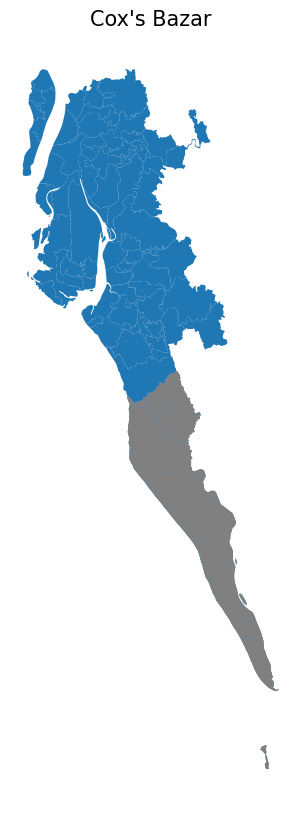

In [125]:
# Test Plot
Coxs_Bazar_geodata_crs = Coxs_Bazar_geodata.to_crs(epsg=3857)
Chittagong_geodata_crs = Chittagong_geodata.to_crs(epsg=3857)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("Cox's Bazar", fontdict={"fontsize": 15, "fontweight": "3"})

Coxs_Bazar_geodata_crs.plot(ax=ax)
Chittagong_geodata_crs.plot(ax=ax, color = "grey")
plt.show()

## Merging Datasets

In [68]:
# Merging map_df and df
merged = map_df.set_index('Site Name').join(df.set_index('Location name'))
print(merged)

               SSID     BlockID     Other Site   Block Name  Note    Status  \
Site Name                                                                     
Burma Para  CXB-004  CXB-004-01  Tasnimarkhola   Burma Para  None    Active   
Jamtoli     CXB-012  CXB-012-01     Thangkhali      Jamtoli  None    Active   
Jumpara     CXB-014  CXB-014-01           None      Jumpara  None    Active   
Leda        CXB-017  CXB-017-03           None   Nuralipara  None    Active   
Leda        CXB-017  CXB-017-02           None  Moulovipara  None    Active   
...             ...         ...            ...          ...   ...       ...   
Zone WW     CXB-131  CXB-131-01           None      Zone WW  None  Inactive   
Zone XX     CXB-132  CXB-132-01           None      Zone XX  None  Inactive   
Zone YY     CXB-133  CXB-133-01           None      Zone YY  None    Active   
Zone ZZ     CXB-134  CXB-134-01           None      Zone ZZ  None  Inactive   
Zone ZA     CXB-135  CXB-135-01           None      

## Plots

### Map 1

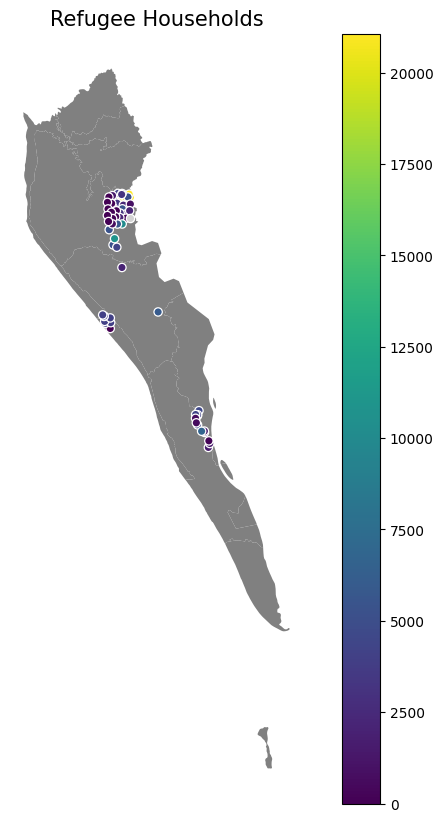

In [117]:
merged = merged.to_crs(epsg=3857)
Chittagong_geodata_crs = Chittagong_geodata.to_crs(epsg=3857)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("Refugee Households", fontdict={"fontsize": 15, "fontweight": "3"})

# Plot
Chittagong_geodata_crs.plot(ax=ax, color = 'grey')
merged.plot(
    column="Total Households",
    cmap="viridis",
    linewidth=0.9,
    ax=ax,
    edgecolor="1",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
)


plt.show()

### Map 2

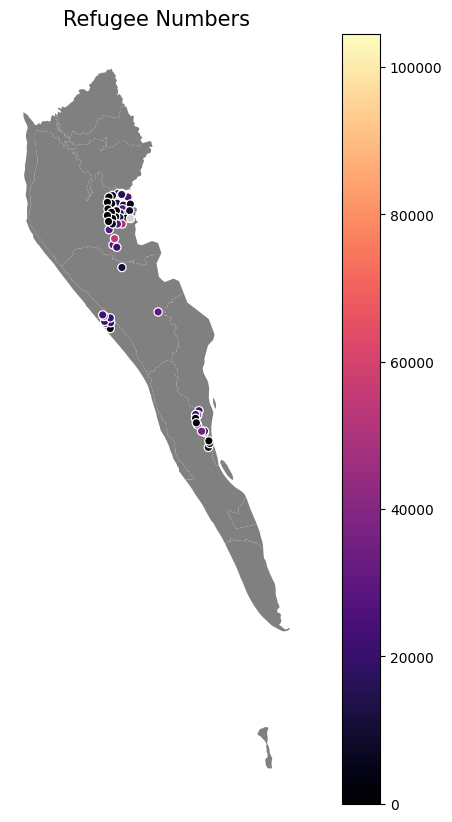

In [121]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("Refugee Numbers", fontdict={"fontsize": 15, "fontweight": "3"})

# Plot
Chittagong_geodata_crs.plot(ax=ax, color = 'grey')
merged.plot(
    column="Total individuals",
    cmap="magma",
    linewidth=0.9,
    ax=ax,
    edgecolor="1",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
)


plt.show()

### Map 3

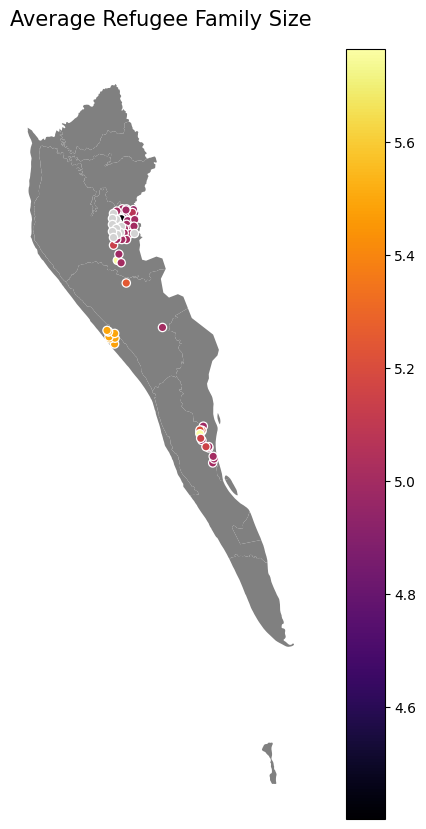

In [122]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("Average Refugee Family Size", fontdict={"fontsize": 15, "fontweight": "3"})

# Plot
Chittagong_geodata_crs.plot(ax=ax, color = 'grey')
merged.plot(
    column="Family size Avg.",
    cmap="inferno",
    linewidth=0.9,
    ax=ax,
    edgecolor="1",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
)


plt.show()